In [8]:
"""
PART 2: Data Augmentation

In this part of the code we will enforce a class balance between all of the labels by augmenting samples until each
class contains 3000 samples.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

In [2]:
tiles_path = "/home/andrea/miccai2020/CISC881/tiles/tiles_16x64x64/256x256_8x_tiles.npy"
tiles = np.load(tiles_path)

labels = '/home/andrea/miccai2020/miccai-data/train.csv'
suspicious_cases = '/home/andrea/miccai2020/miccai-data/suspicious_test_cases.csv'
# remove suspicious cases
suspicious_cases_df = pd.read_csv(suspicious_cases)
label_df = pd.read_csv(labels)
suspicious_case_list = suspicious_cases_df['image_id'].tolist()
label_df = label_df[~label_df['image_id'].isin(suspicious_case_list)]
labels = label_df['isup_grade'].values

(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0 2872]
 [   1 2585]
 [   2 1337]
 [   3 1216]
 [   4 1220]
 [   5 1197]]


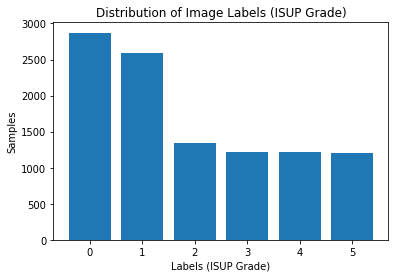

<Figure size 432x288 with 0 Axes>

In [4]:
# generate distribution figure of ISUP labels
plt.title("Distribution of Image Labels (ISUP Grade)")
plt.ylabel('Samples')
plt.xlabel("Labels (ISUP Grade)")
plt.bar(unique, counts)
plt.show()
plt.savefig("Distribution_of_ISUP_grades")

In [5]:
"""
This function will instantiate a bunch of different augmentations and return a random augmentation
so that we can have a balanced data set for training in the next step.

This function was slightly modified from my CISC 881 A3 so that we can apply it to this project
"""

def get_augments(tile):
    augs = ["rot90", "rot180", "rot270", "fliplr", "flipud"]
    rand_aug_choice = random.choice(augs)

    if rand_aug_choice == "rot90": # 90 degree rotation
        aug = np.asarray([np.rot90(tile)])
        return aug

    elif rand_aug_choice == "rot180": # 180 degree rotation
        aug = np.asarray([np.rot90(np.rot90(tile))])
        return aug
    
    elif rand_aug_choice == "rot270": # 270 degree rotation
        aug = np.asarray([np.rot90(np.rot90(np.rot90(tile)))])
        return aug

    elif rand_aug_choice == "fliplr": # horizontal flip
        aug = np.asarray([np.fliplr(tile)])
        return aug

    else:
        aug = np.asarray([np.flipud(tile)]) # vertical flip
        return aug

In [ ]:

"""
This function enforces a class balance of 3000 samples in each class.
It is designed to iterate through all the original/non-augmented patches and append a random
augmentation from the get_augments() function. The labels are also updated accordingly.
"""
num_0 = 2872 # number of samples that exist in that class already
num_1 = 2585
num_2 = 1337
num_3 = 1220
num_4 = 1216
num_5 = 1197

aug_labels = labels # put new balanced labels here
aug_tiles = tiles # put new training balanced tiles here
print(aug_tiles.shape)

# iterate through the patches until we have 3000 samples for each class
while (num_0 != 3000 or num_1 != 3000 or num_2 != 3000 or num_3 != 3000 or num_4 != 3000 or num_5 != 3000):
    for i in range(len(tiles)):
        if labels[i] == 0: # if ISUP grade = 0
            if num_0 < 3000:
                print("augmenting class 0")
                # get a random augmentation and append 
                rand_aug = get_augments(tiles[i])
                while (np.std(rand_aug) == 0): # discard augs that have std dev of 0
                    print("standard dev 0, getting new aug for: ", i)
                    rand_aug = get_augments(tiles[i])
                aug_tiles = np.vstack((aug_tiles, rand_aug)) # append random aug
                aug_labels = np.append(aug_labels, 0) # append corresponding label
                num_0 = num_0 + 1
                print(aug_tiles.shape)
            else:
                pass

        elif labels[i] == 1:
            if num_1 < 3000:
                print("augmenting class 1")
                rand_aug = get_augments(tiles[i])
                while (np.std(rand_aug) == 0):
                    print("standard dev 0, getting new aug for: ", i)  
                    rand_aug = get_augments(tiles[i])
                aug_tiles = np.vstack((aug_tiles, rand_aug))
                aug_labels = np.append(aug_labels, 1)
                num_1 = num_1 + 1
                print(aug_tiles.shape)
            else:
                pass

        elif labels[i] == 2:
            if num_2 < 3000:
                print("augmenting class 2")
                rand_aug = get_augments(tiles[i])
                while (np.std(rand_aug) == 0):
                    print("standard dev 0, getting new aug for: ", i)  
                    rand_aug = get_augments(tiles[i])
                aug_tiles = np.vstack((aug_tiles, rand_aug))
                aug_labels = np.append(aug_labels, 2)
                num_2 = num_2 + 1
                print(aug_tiles.shape)
            else:
                pass

        elif labels[i] == 3:
            if num_3 < 3000:
                print("augmenting class 3")
                rand_aug = get_augments(tiles[i])
                while (np.std(rand_aug) == 0):
                    print("standard dev 0, getting new aug for: ", i)  
                    rand_aug = get_augments(tiles[i])
                aug_tiles = np.vstack((aug_tiles, rand_aug))
                aug_labels = np.append(aug_labels, 3)
                num_3 = num_3 + 1
                print(aug_tiles.shape)
            else:
                pass

        elif labels[i] == 4:
            if num_4 < 3000:
                print("augmenting class 4")
                rand_aug = get_augments(tiles[i])
                while (np.std(rand_aug) == 0):
                    print("standard dev 0, getting new aug for: ", i)  
                    rand_aug = get_augments(tiles[i])
                aug_tiles = np.vstack((aug_tiles, rand_aug))
                aug_labels = np.append(aug_labels, 4)
                num_4 = num_4 + 1
                print(aug_tiles.shape)
            else:
                pass

        else:
            if num_5 < 3000:
                print("augmenting class 5")
                rand_aug = get_augments(tiles[i])
                while (np.std(rand_aug) == 0):
                    print("standard dev 0, getting new aug for: ", i)  
                    rand_aug = get_augments(tiles[i])
                aug_tiles = np.vstack((aug_tiles, rand_aug))
                aug_labels = np.append(aug_labels, 5)
                print(aug_tiles.shape)
                num_5 = num_5 + 1
            else:
                pass              

In [9]:
tiles_dir = '/home/andrea/miccai2020/CISC881/tiles'
tiles_BAL_16x64x64 = os.path.join(tiles_dir, "tiles_BAL_16x64x64/")

if not os.path.exists(tiles_BAL_16x64x64):
    os.makedirs(tiles_BAL_16x64x64)
    print("created tiles_BAL_16x64x64 directory.")
else:
    print("tiles_BAL_16x64x64 directory exists.")

tiles_BAL_16x64x64 directory exists.


In [ ]:
# save labels and tiles
labels_name = "labels_BAL_3000_AUG_16x64x64.npy"
tiles_name = "tiles_BAL_3000_AUG_16x64x64.npy"

label_output_dir = os.path.join(tiles_BAL_16x64x64, labels_name)
np.save(label_output_dir, aug_labels)

tile_output_dir = os.path.join(tiles_BAL_16x64x64, tiles_name)
np.save(tile_output_dir, aug_tiles)

Text(0.5, 1.0, 'Vertical Flip Augmentation')

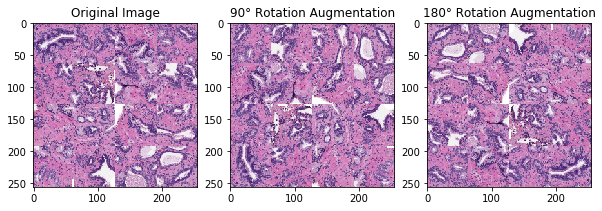

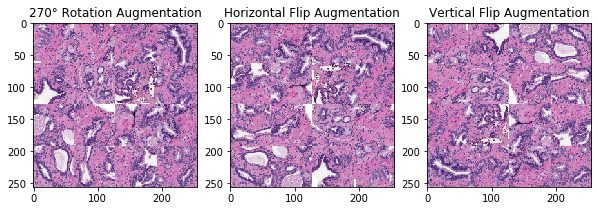

In [10]:
"""
Generate some augmentations for our report
"""
test = tiles[5]

test_90 = np.rot90(test)
test_180 = np.rot90(test_90)
test_270 = np.rot90(test_180)

test_lr = np.fliplr(test)
test_ud = np.flipud(test)

plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(test)
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(test_90)
plt.title("90° Rotation Augmentation")

plt.subplot(1,3,3)
plt.imshow(test_180)
plt.title("180° Rotation Augmentation")

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(test_270)
plt.title("270° Rotation Augmentation")

plt.subplot(1,3,2)
plt.imshow(test_lr)
plt.title("Horizontal Flip Augmentation")

plt.subplot(1,3,3)
plt.imshow(test_ud)
plt.title("Vertical Flip Augmentation")


In [14]:
# Save a subset of the tiles and labels to submit in final project submission
labels_subset = labels[:100]
print(labels_subset.shape)
labels_subset_name = "labels_subset_16x64x64.npy"
label_output_dir = os.path.join(tiles_BAL_16x64x64, labels_subset_name)
np.save(label_output_dir, labels_subset)

tiles_subset = tiles[:100]
print(tiles_subset.shape)
tiles_subset_name = "tiles_subset_16x64x64.npy"
tile_output_dir = os.path.join(tiles_BAL_16x64x64, tiles_subset_name)
np.save(tile_output_dir, tiles_subset)


(100,)
(100, 256, 256, 3)
